Testing code for linear regressions

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
print(reg.coef_)
print(reg.intercept_)
#print(reg.predict([[3, 3]]))

[0.5 0.5]
1.1102230246251565e-16


Non Negetive least squares 
Generating some random data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42) # For reproducibility
n_samples, n_features = 200, 50 #
x=np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
true_coef[true_coef < 0] = 0  # enforce non-negativity
y=np.dot(x, true_coef)

y+=5 * np.random.normal(size=n_samples)
print("Number of non-zero coefficients in the ground truth:", np.sum(true_coef != 0))
print("Ground truth coefficients:", true_coef)
#print("Input data (first 5 samples):\n", x[:5])
#print("Target values (first 5 samples):\n", y[:5])   



Splitting the data in train set and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42) # Splitting the data in train set and test set

For non negative least squares (NNLS)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test) # Fitting the model and predicting the values
r2_score_nnls = r2_score(y_test, y_pred_nnls) #
print("NNLS R^2:", r2_score_nnls)

NNLS R^2: 0.7921902769304822
[1.66928462 0.         0.         1.12496012 4.62426923 0.14848267
 2.21059938 0.96708311 0.44245293 1.65997245 2.16226678 2.34206619
 0.         0.51338009 2.12737396 0.99157358 0.51885898 0.11194361
 0.         4.89240885 5.54756715 2.17617625 3.28357297 1.27147054
 2.32145624 4.36056651 1.209559   0.4642923  0.08509133 0.3312238
 2.92165159 2.91543632 2.03299413 0.         0.05811007 1.29713962
 0.8050887  0.27065961 1.18694689 6.80621679 0.33616193 0.06042175
 0.14385769 0.01966391 0.48074168 0.66974469 1.36614807 1.00224137
 1.44588106 1.59432624]


Fit an OLS Ordinary Least Squares

In [16]:
reg_ols = LinearRegression() # Ordinary Least Squares
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R^2:", r2_score_ols)

OLS R^2: 0.7604320840233199


OLS and NNLS are same in above case but NNLS constraints shrink some data points to 0
NNLS yields sparse results

TypeError: Got both 'color' and 'c', which are aliases of one another

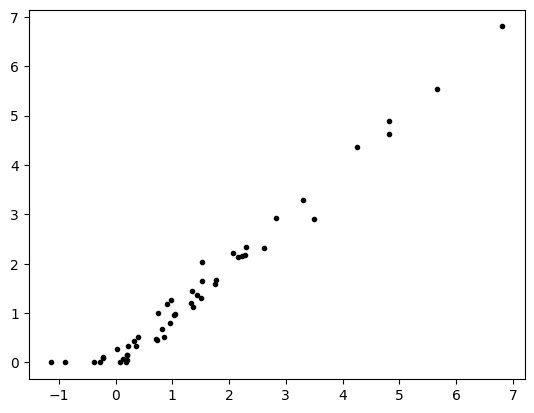

In [23]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker = ".", color='k')

low_x, high_x = ax.get_xlim() # get the x-axis limits
low_y, high_y = ax.get_ylim() # get the y-axis limits
low = min(low_x, low_y) # get the lowest of the two
high = max(high_x, high_y) # get the highest of the two
ax.plot([low, high], [low, high], color='r', ls='--', c="0.3", alpaha=0.5) # plot a diagonal line
ax.set_xlabel("OLS regression Coefficients", frontweight='bold')
ax.set_ylabel("NNLS regression Coefficients", frontweight='bold') 